# Sample with isets

In [1]:
%matplotlib inline
import os, sys
import logging

import numpy as np
from scipy.ndimage import imread, filters
from scipy.misc import imresize
from matplotlib import pyplot as plt

from morphsnakes.morphsnakes import MorphGAC, MorphACWE, gborders
import morphsnakes.multi_snakes as multi_ms
from tests.tests import rgb2gray, circle_levelset

PATH_IMG_ISLETS = os.path.abspath(os.path.join('images', 'Lh10-03.jpg')) 

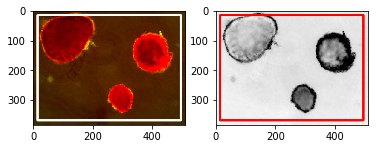

In [2]:
# Load the image.
img_color = imread(PATH_IMG_ISLETS) / 255.0
img_color = imresize(img_color, 0.5)
img = img_color[:, :, 0]
BORDER = 15
levelset = np.zeros(img.shape)
levelset[BORDER:-BORDER, BORDER:-BORDER] = 1

_= plt.subplot(1, 2, 1), plt.imshow(img_color), plt.contour(levelset, colors='w') 
_= plt.subplot(1, 2, 2), plt.imshow(img, cmap=plt.cm.Greys), plt.contour(levelset, colors='r')

## MorphACWE

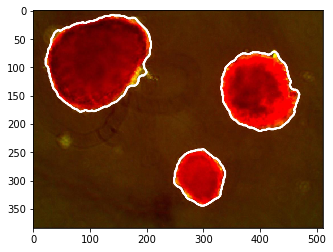

In [8]:
# Morphological ACWE. Initialization of the level-set.
macwe = MorphACWE(levelset, img, smoothing=5, lambda1=1, lambda2=1)
macwe.run(250)

_= plt.imshow(img_color), plt.contour(macwe.levelset, colors='w')

## MorphGAC

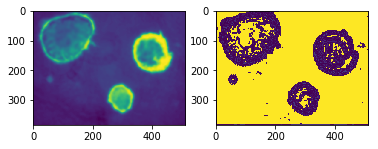

In [6]:
img_gauss = filters.gaussian_filter(img, 3)
img_grad = gborders(img_gauss, alpha=100, sigma=1)

_= plt.subplot(1, 2, 1), plt.imshow(img_gauss)
_= plt.subplot(1, 2, 2), plt.imshow(img_grad)

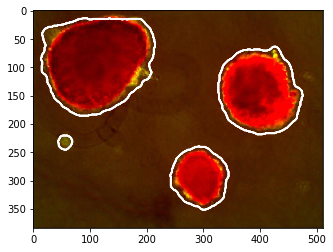

In [7]:
# Morphological GAC. Initialization of the level-set.
mgac = MorphGAC(levelset, img_grad, smoothing=5, threshold=0.3, balloon=-1)
mgac.run(250)

_= plt.imshow(img_color), plt.contour(mgac.levelset, colors='w')